In [ ]:
!pip install -U scikit-learn pandas numpy catboost plotly nbformat

### Read train data

In [1]:
import pandas as pd

train_data = pd.read_csv('train.csv', header=None)

train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-220.530530,-70.197440,119.035181,20.711737,-6.152986,52.225051,-23.230903,-166.521871,-41.571463,2.620401,...,16.936420,46.543585,-80.962171,-146.652218,10.899085,4.370985,4.060272,40.680890,-37.942655,33.838225
1,-8.536541,-8.305435,-117.828269,-28.588333,14.223240,-42.087807,-45.538664,58.898976,27.749744,2.545916,...,57.027508,121.304258,31.507396,88.282912,66.766185,-4.363974,-5.791376,-32.101939,-52.255449,-4.826111
2,126.229973,133.463504,-105.511797,-149.110267,-3.673355,-104.302244,5.815395,100.838385,-46.240211,0.141700,...,4.819849,88.905713,51.475105,-73.257358,108.947287,8.567240,0.116269,-117.205053,-107.835928,-93.990332
3,369.571563,11.850181,-299.969407,29.371721,-3.457523,-115.901854,159.134323,-149.741411,-108.847522,0.078277,...,80.930568,-166.476192,-73.882682,108.222355,19.573192,-2.242024,0.515601,-25.218215,121.674228,-16.877368
4,-99.563708,-85.166292,-73.363391,-35.357907,5.437025,-54.892519,56.430532,-49.237377,-50.054608,2.586612,...,31.682235,209.163125,-22.847302,-62.067337,58.109167,2.862082,0.920341,-132.875142,3.492953,-15.799596


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
 9   9       10000 non-null  float64
 10  10      10000 non-null  float64
 11  11      10000 non-null  float64
 12  12      10000 non-null  float64
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
 21  21      10000 non-null  float64
 22 

In [3]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,12.844797,-0.299114,17.445400,-1.089765,0.060510,-0.067073,2.009180,-28.428487,16.467341,1.349504,...,0.211515,-2.636170,-13.042007,0.428028,0.999935,-0.153092,0.493480,1.096011,0.690934,-8.751687
std,331.218970,87.840630,166.830889,77.132117,7.079223,95.328230,112.574723,124.090562,141.363732,1.263255,...,46.418509,165.031271,62.060615,82.821135,77.482044,8.557124,1.888925,99.041787,100.623747,78.557761
min,-1625.085835,-285.272638,-670.544061,-287.536745,-25.612006,-404.876372,-395.781633,-514.417062,-526.193023,0.000011,...,-196.452972,-766.155471,-255.701616,-362.646319,-276.221505,-31.560708,-9.925537,-381.244544,-388.045812,-338.939731
25%,-186.892257,-60.304200,-90.723945,-52.634237,-4.781103,-65.870246,-74.324525,-110.342167,-78.871151,0.073837,...,-31.016369,-115.622198,-54.202381,-56.184700,-51.076999,-5.897427,0.045169,-65.880474,-66.301084,-61.817245
50%,30.376174,-0.576299,18.361277,-1.449727,-0.017278,-1.396145,2.512421,-27.857590,14.174901,2.525594,...,0.459627,-8.188229,-12.628320,0.334218,0.464923,-0.101883,0.492704,0.700402,-4.469156,-10.324727
75%,231.413537,58.639722,126.733466,51.377692,4.827844,63.905144,76.779477,55.226946,110.592913,2.600066,...,31.697139,101.651604,28.586541,55.119716,52.929229,5.634585,0.941508,67.585794,62.984446,43.972321
max,1746.951115,348.103285,786.045193,305.712632,28.931791,351.851613,447.816362,402.650987,598.634382,2.674410,...,191.379527,681.156385,202.958195,302.583135,264.326359,33.644683,12.157634,418.514443,455.981845,340.571609


In [4]:
y = pd.read_csv('train-target.csv', header=None)
y[:10]

,0
0,1
1,1
2,0
3,0
4,1
5,0
6,1
7,1
8,1
9,1


### Class balance

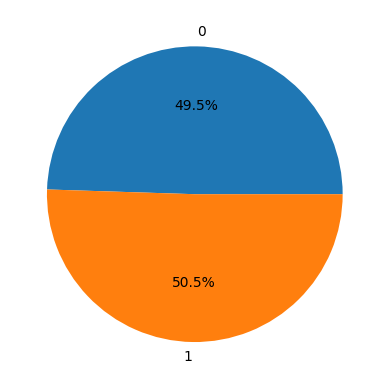

In [6]:
import matplotlib.pyplot as plt

plt.pie([y.value_counts()[0], y.value_counts()[1]], labels=['0','1'], autopct='%1.1f%%')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data, y, test_size=0.2)


### Correlation matrix

In [7]:
df = train_data.copy()
df['label'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,label
0,-220.530530,-70.197440,119.035181,20.711737,-6.152986,52.225051,-23.230903,-166.521871,-41.571463,2.620401,...,46.543585,-80.962171,-146.652218,10.899085,4.370985,4.060272,40.680890,-37.942655,33.838225,1
1,-8.536541,-8.305435,-117.828269,-28.588333,14.223240,-42.087807,-45.538664,58.898976,27.749744,2.545916,...,121.304258,31.507396,88.282912,66.766185,-4.363974,-5.791376,-32.101939,-52.255449,-4.826111,1
2,126.229973,133.463504,-105.511797,-149.110267,-3.673355,-104.302244,5.815395,100.838385,-46.240211,0.141700,...,88.905713,51.475105,-73.257358,108.947287,8.567240,0.116269,-117.205053,-107.835928,-93.990332,0
3,369.571563,11.850181,-299.969407,29.371721,-3.457523,-115.901854,159.134323,-149.741411,-108.847522,0.078277,...,-166.476192,-73.882682,108.222355,19.573192,-2.242024,0.515601,-25.218215,121.674228,-16.877368,0
4,-99.563708,-85.166292,-73.363391,-35.357907,5.437025,-54.892519,56.430532,-49.237377,-50.054608,2.586612,...,209.163125,-22.847302,-62.067337,58.109167,2.862082,0.920341,-132.875142,3.492953,-15.799596,1


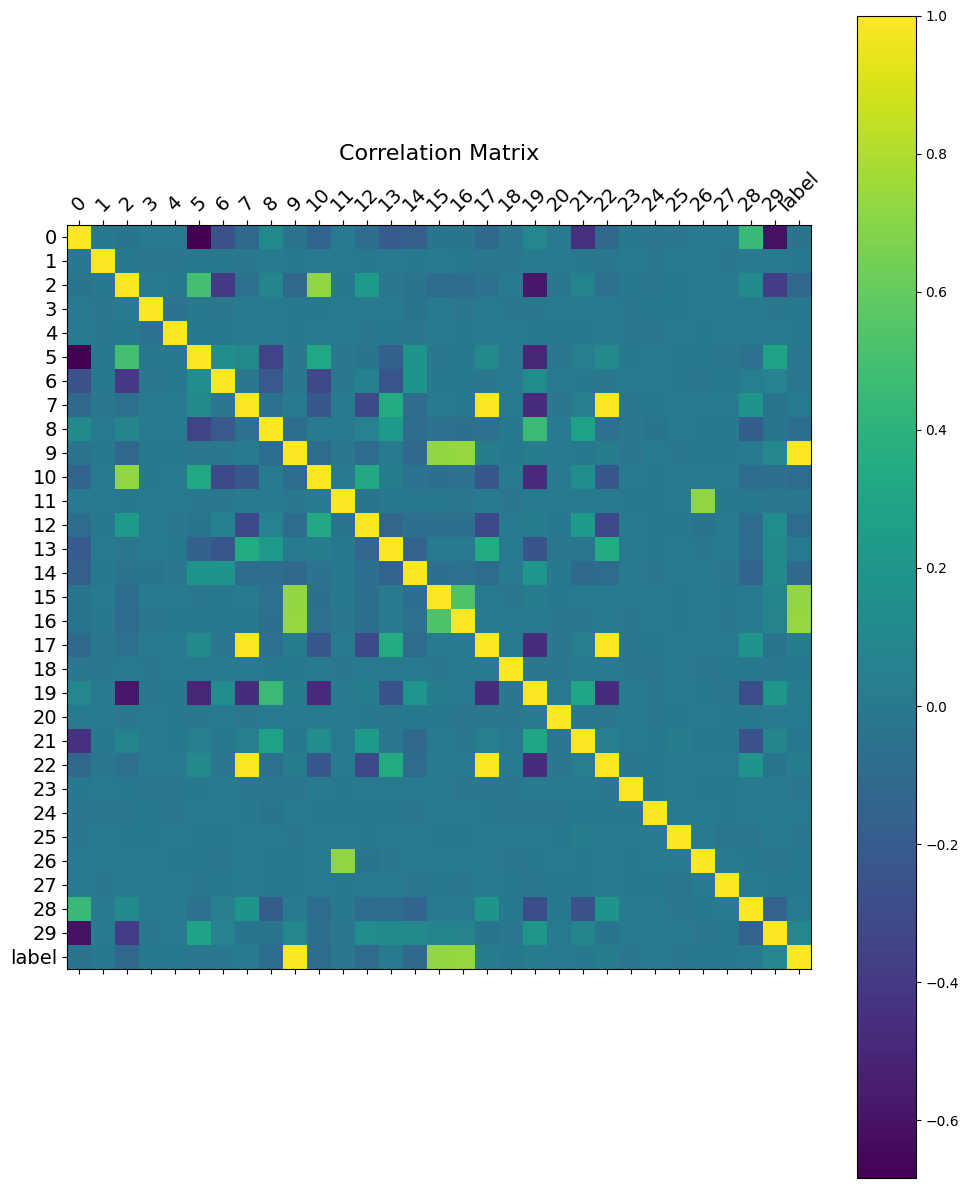

In [8]:
f = plt.figure(figsize=(12,15))
plt.matshow(df.corr(),fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
# cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

### Columns distribution

In [9]:
test_data = pd.read_csv('test.csv', header=None)

In [10]:
import plotly.graph_objects as pgo
import numpy as np

plot = pgo.Figure()

column = np.random.randint(0,30)
 
plot.add_trace(pgo.Box(y=df[column], name=f'train, {column}',  boxpoints="all"))
plot.add_trace(pgo.Box(y=test_data[column], name=f'test, {column}',  boxpoints="all"))

plot.show()

### Baseline prediction

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

In [65]:
knn_clf.fit(df.drop(['label'], axis=1), y=df['label'])

KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='distance')

In [66]:
def save_array_to_submission(array, name='last_submission'):

    assert array.shape == (2000, 2), 'shape doesnt match'

    df_subm = pd.DataFrame(array, columns=[0,1])

    df_subm[1].to_csv(f'{name}.csv', index=False, header=False)
    return 'ok'

In [67]:
predict = knn_clf.predict_proba(test_data)
predict

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [68]:
save_array_to_submission(predict, name='lovely_baseline')

'ok'